In [21]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [22]:
df = pd.read_csv('행정구별_상주인구_소득_소비.csv', encoding = 'utf-8', index_col = 'district')

In [23]:
df.drop('Unnamed: 0',axis =1, inplace = True)

In [24]:
df = df.applymap(lambda x: x.replace(',', '') if isinstance(x, str) else x)
df = df.astype('float64')

In [25]:
df = df.dropna()

In [26]:
data_copy = df.copy()
data_c = data_copy.values

In [27]:
data_c

array([[5.26500000e+03, 5.02500000e+03, 4.88800000e+03, 5.08900000e+03,
        5.04000000e+03, 4.82400000e+03, 4.75800000e+03, 5.01900000e+03,
        5.18800000e+03, 1.07630000e+04, 9.00000000e-02, 2.80000000e-01,
        2.10000000e-01, 1.30000000e-01, 7.00000000e-02, 5.00000000e-02,
        1.80000000e-01, 1.56412227e+09, 1.03840800e+03],
       [4.66300000e+03, 4.30300000e+03, 4.13600000e+03, 4.34700000e+03,
        4.32300000e+03, 4.02800000e+03, 3.80800000e+03, 4.04500000e+03,
        4.05200000e+03, 1.94100000e+03, 1.00000000e-01, 3.40000000e-01,
        2.60000000e-01, 1.30000000e-01, 6.00000000e-02, 4.00000000e-02,
        8.00000000e-02, 1.73281890e+07, 8.11208000e+02],
       [3.55300000e+03, 3.50900000e+03, 3.52300000e+03, 3.75100000e+03,
        3.74100000e+03, 3.51400000e+03, 3.38100000e+03, 4.17200000e+03,
        4.38900000e+03, 6.50800000e+03, 1.40000000e-01, 4.10000000e-01,
        2.50000000e-01, 1.00000000e-01, 4.00000000e-02, 2.00000000e-02,
        3.00000000e-02

In [8]:
scaler = StandardScaler()
data_c = scaler.fit_transform(data_c)

C:\Users\INTEL WIN11PRO(12TH)\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


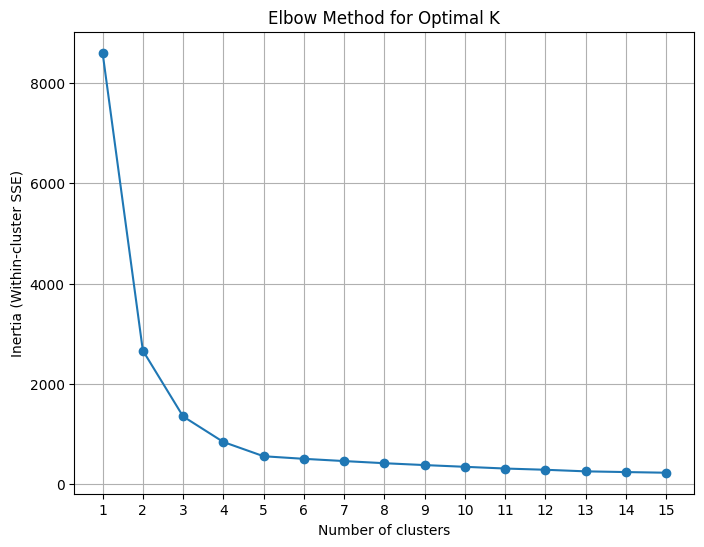

In [29]:
data_cluster_value, _ = make_blobs(n_samples=300, centers=5, random_state=0, cluster_std=1.0)

cluster_range = range(1, 16)
inertia = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(data_cluster_value)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (Within-cluster SSE)')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

In [10]:
data_c

array([[-0.69644709, -0.75325879, -0.78439963, -0.78031865, -0.82116267,
        -0.77418055, -0.78455263, -0.8688934 , -0.85729404,  0.42144812,
        -1.78598805, -2.29900245, -1.46558145,  1.61174531,  1.7441632 ,
         2.11057941,  2.71073123,  1.7012306 , -0.85728785],
       [-0.76508559, -0.83981993, -0.88020092, -0.86737924, -0.91023191,
        -0.89274388, -0.94662385, -1.03986497, -1.05484185, -1.28416128,
        -1.26325984, -0.64372069,  1.1991121 ,  1.61174531,  0.51298918,
         0.90453403,  0.14941038, -0.45971161, -1.0548355 ],
       [-0.89164496, -0.93501321, -0.95829426, -0.93730931, -0.98253079,
        -0.96930362, -1.0194706 , -1.01757196, -0.99623832, -0.40119618,
         0.827653  ,  1.28744137,  0.66617339, -1.52462395, -1.94935887,
        -1.50755672, -1.13125004, -0.47361269, -0.99624593],
       [-0.5422955 , -0.56215289, -0.57088504, -0.5957549 , -0.64265152,
        -0.64131813, -0.66598474, -0.79780152, -0.79556035, -1.07613184,
        -0.740

In [11]:
kmeans = KMeans(n_clusters=4, max_iter=100, verbose=1)
clusters = kmeans.fit_predict(data_c)

Initialization complete
Iteration 0, inertia 238.5463243887316
Iteration 1, inertia 158.33400067362538
Iteration 2, inertia 155.91245126872363
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 235.9471452072417
Iteration 1, inertia 194.8472500563916
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 247.09494139275563
Iteration 1, inertia 165.51859426220506
Iteration 2, inertia 160.95574768227803
Iteration 3, inertia 155.07042194214142
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 215.3240072908876
Iteration 1, inertia 155.07042194214142
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 260.11165961686646
Iteration 1, inertia 192.8041463695096
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 216.859124056197
Iteration 1, inertia 155.91245126872363
Converged at iteration 1: strict 

In [12]:
cluster_nums = []
for doc_num, cluster_num in enumerate(clusters): 
    cluster_nums.append(cluster_num)
    print(doc_num, cluster_num)

0 3
1 0
2 0
3 0
4 1
5 1
6 2
7 1
8 0
9 1
10 1
11 1
12 1
13 0
14 3
15 1
16 0
17 0
18 2
19 1
20 0
21 1
22 1
23 0


In [13]:
kmeans.labels_

array([3, 0, 0, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 0, 3, 1, 0, 0, 2, 1, 0, 1,
       1, 0])

In [14]:
data_copy['레이블'] = cluster_nums

In [15]:
data_copy.head(20)

,Res_population_2015,Res_population_2016,Res_population_2017,Res_population_2018,Res_population_2019,Res_population_2020,Res_population_2021,population_2023,population_2024,Income_population,INCOME_TWO_TMW_INHBT_RATE,INCOME_THREE_TMW_INHBT_RATE,INCOME_FOUR_TMW_INHBT_RATE,INCOME_FIVE_TMW_INHBT_RATE,INCOME_SIX_TMW_INHBT_RATE,INCOME_SEVEN_TMW_INHBT_RATE,INCOME_SEVEN_TMW_ABOVE_INHBT_RATE,FRNR_ALL_EXPNDTR_PRICE,income_all,레이블
district,,,,,,,,,,,,,,,,,,,,
강남구,5265.0,5025.0,4888.0,5089.0,5040.0,4824.0,4758.0,5019.0,5188.0,10763.0,0.09,0.28,0.21,0.13,0.07,0.05,0.18,1.564122e+09,1038.408,3
강동구,4663.0,4303.0,4136.0,4347.0,4323.0,4028.0,3808.0,4045.0,4052.0,1941.0,0.10,0.34,0.26,0.13,0.06,0.04,0.08,1.732819e+07,811.208,0
강북구,3553.0,3509.0,3523.0,3751.0,3741.0,3514.0,3381.0,4172.0,4389.0,6508.0,0.14,0.41,0.25,0.10,0.04,0.02,0.03,7.377850e+06,878.592,0
강서구,6617.0,6619.0,6564.0,6662.0,6477.0,5716.0,5453.0,5424.0,5543.0,3017.0,0.11,0.34,0.26,0.13,0.06,0.04,0.07,2.124256e+08,1109.408,0
관악구,19368.0,18756.0,17632.0,18083.0,17240.0,14743.0,13750.0,14813.0,15238.0,27036.0,0.12,0.40,0.26,0.11,0.05,0.02,0.04,4.346821e+07,3048.400,1
광진구,14811.0,14889.0,14595.0,15504.0,15622.0,13427.0,12631.0,14124.0,14651.0,7320.0,0.13,0.38,0.24,0.11,0.05,0.03,0.06,8.652487e+07,2931.000,1
구로구,32512.0,32049.0,30817.0,33989.0,32707.0,28080.0,24409.0,22800.0,22941.0,9733.0,0.13,0.39,0.24,0.11,0.05,0.03,0.05,6.396364e+07,4589.000,2
금천구,19883.0,19268.0,18337.0,20104.0,19010.0,16102.0,14080.0,13160.0,13332.0,4979.0,0.14,0.41,0.25,0.11,0.05,0.02,0.03,4.634691e+07,2667.208,1
노원구,3638.0,3631.0,3672.0,4408.0,4398.0,3995.0,3990.0,4474.0,4537.0,6873.0,0.13,0.34,0.25,0.12,0.06,0.03,0.06,1.591175e+07,908.192,0


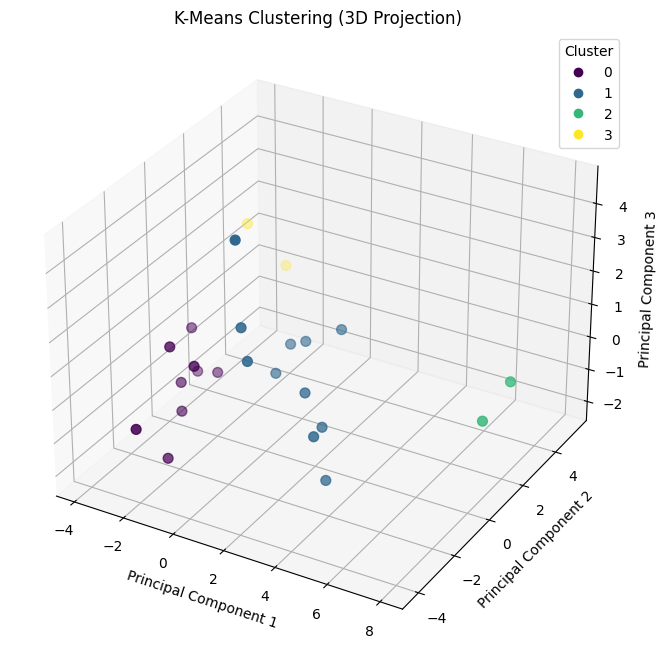

In [16]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


pca = PCA(n_components=3)
data_3d = pca.fit_transform(data_c)

# K-Means 클러스터링 결과
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], c=clusters, cmap='viridis', s=50)
ax.set_title('K-Means Clustering (3D Projection)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend(*scatter.legend_elements(), title='Cluster')
plt.show()




In [19]:
cluster_mean= data_copy.groupby('레이블').mean().reset_index()

In [20]:
cluster_mean

,레이블,Res_population_2015,Res_population_2016,Res_population_2017,Res_population_2018,Res_population_2019,Res_population_2020,Res_population_2021,population_2023,population_2024,Income_population,INCOME_TWO_TMW_INHBT_RATE,INCOME_THREE_TMW_INHBT_RATE,INCOME_FOUR_TMW_INHBT_RATE,INCOME_FIVE_TMW_INHBT_RATE,INCOME_SIX_TMW_INHBT_RATE,INCOME_SEVEN_TMW_INHBT_RATE,INCOME_SEVEN_TMW_ABOVE_INHBT_RATE,FRNR_ALL_EXPNDTR_PRICE,income_all
0,0,4887.777778,4744.555556,4633.000000,4846.555556,4849.222222,4412.888889,4192.555556,4434.111111,4529.555556,7307.333333,0.124444,0.361111,0.248889,0.116667,0.054444,0.031111,0.062222,1.270313e+08,906.710222
1,1,13074.727273,13413.272727,13300.545455,14089.727273,14256.272727,12096.636364,11537.181818,12922.181818,13094.636364,9469.000000,0.130909,0.377273,0.232727,0.110909,0.053636,0.030909,0.066364,4.649431e+08,2619.729455
2,2,35909.500000,34107.500000,32145.500000,34905.500000,33007.500000,27983.500000,24240.000000,22592.500000,22822.000000,9034.000000,0.125000,0.385000,0.235000,0.110000,0.055000,0.030000,0.065000,2.216833e+08,4565.204000
3,3,6663.500000,6463.500000,6395.500000,6665.500000,6565.000000,5886.500000,5720.000000,6009.500000,6189.000000,9001.000000,0.085000,0.275000,0.215000,0.130000,0.075000,0.050000,0.180000,8.061448e+08,1238.608000


In [170]:
data_copy.to_csv('데이터_레이블_달린거.csv', encoding = 'utf-8-sig')